In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from scipy import stats

In [5]:
x = np.array([94, 96, 94, 95, 104, 106, 108, 113, 115, 121, 131])
y = [0.47, 0.75, 0.83, 0.98, 1.18, 1.29, 1.40, 1.60, 1.75, 1.90, 2.23]
N = len(x)

X = np.hstack((np.ones((N, 1)), x.reshape(N, 1)))
w_hat = inv(X.T.dot(X)).dot(X.T).dot(y)
y_hat = X.dot(w_hat)
sigma2 = sum((y - y_hat) ** 2) / (N - 2.0)
V0_inv = np.array([[0, 0],[0, 1]])
w0 = np.array([1, 0])
VN_inv = V0_inv + X.T.dot(X) / sigma2
VN = inv(VN_inv)
wN = VN.dot(X.T).dot(y) / sigma2

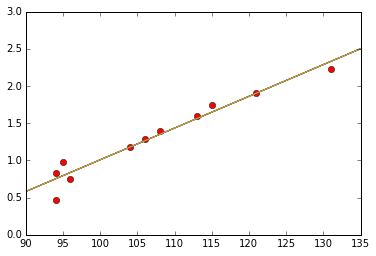

In [14]:
def abline(intercept, slope):
    x = np.array(plt.gca().get_xlim())
    X = np.hstack((np.ones((2, 1)), x.reshape(2, 1)))
    y = X.dot(wN)
    plt.plot(x, y)
    
plt.plot(x, y, 'ro')
abline(wN[0], wN[1])
for w in stats.multivariate_normal.rvs(wN, VN, size = 5):
    abline(w[0], w[1])
plt.show()